# Zimp Sentence Count Analysis

How much do different tokenizers diverge?

In [1]:
import pandas as pd
import numpy as np
import os
import math
import logging
import matplotlib.pyplot as plt
import time
from zimp.pos.tokenization.builder import SentenceTokenizerStrategy
from zimp.pos.sentence_count_analyzer import SentenceCountAnalyzer
from glob import glob

plt.style.use('seaborn-whitegrid')

source_dir = '../../zimp_orchestrator/orch/resources'
files = {}

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!


In [2]:
for ds_path in glob(source_dir + '/*'):
    if not os.path.isdir(ds_path):
        continue
    ds_name = os.path.basename(ds_path)
    files[ds_name] = [os.path.join(ds_path, 'train.csv'), os.path.join(ds_path, 'test.csv')]

In [3]:
def get_ds_stats(ds_name, paths, sca_builder, track_name):
    texts = pd.read_csv(paths[0]).text.append(pd.read_csv(paths[1]).text)
    start_time = time.process_time()
    df =  sca_builder(texts).extract_dataset_metric().rename(columns={'count': track_name})
    print(f"{ds_name} with {track_name} took {time.process_time()-start_time}s")
    return df

In [4]:
def line_plot(df_plot, dataset):
    df_plot.plot(
        figsize=(10,5),
        color=plt.cm.jet(np.linspace(0, 1, len(df_plot.columns))),
        alpha=.5,
        title=f'Number of sentences per observation ({dataset})',
        xlabel='Number of sentences',
        ylabel='Frequency'
    )
    
    plt.savefig(f'sentence_compare/barchart_{dataset}.pdf')
    plt.show()

In [5]:
def violin_plot(df_plot, dataset):       
    fig, axes = plt.subplots(figsize=(15,5))

    v_parts = axes.violinplot(dataset = [df_plot.index.repeat(df_plot[col].fillna(0)) for col in df_plot.columns], showmedians=True)

    colors=plt.cm.jet(np.linspace(0, 1, len(df_plot.columns)))

    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = v_parts[partname]
        vp.set_edgecolor('#000000')
        vp.set_linewidth(.5 if partname == 'cbars' else 1)
        vp.set_alpha(.5 if partname == 'cbars' else 1)

    # Make the violin body blue with a red border:
    for idx, vp in enumerate(v_parts['bodies']):
        vp.set_facecolor(colors[idx])
        vp.set_edgecolor(colors[idx])
        vp.set_linewidth(1)
        vp.set_alpha(0.5)

    axes.set_title(f'Sentence Count per strategy  ({dataset})')
    axes.yaxis.grid(True)
    axes.set_xlabel('Strategy')
    axes.set_ylabel('Count of Sentences')
    axes.set_xticks(np.arange(1, len(df_plot.columns) + 1), labels=df_plot.columns, fontsize=8)
    
    plt.savefig(f'sentence_compare/violinplot_{dataset}.pdf')
    plt.show()

10K-GNAD with SIMPLE took 0.75s
10K-GNAD with PUNKT took 8.03125s
10K-GNAD with CORPUS_PUNKT took 49.765625s
10K-GNAD with EUROPARL took 30.8125s
10K-GNAD with SPACY took 33.15625s
10K-GNAD with PUNKT_GER took 8.140625s
10K-GNAD with EUROPARL_GER took 30.234375s
10K-GNAD with SPACY_GER took 28.1875s


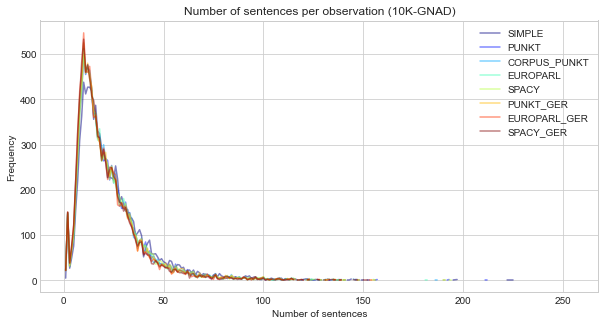

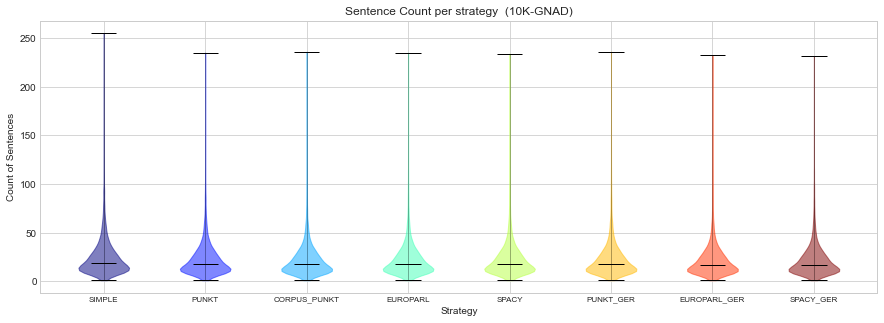

DBP-14 with SIMPLE took 6.546875s
DBP-14 with PUNKT took 59.28125s
DBP-14 with CORPUS_PUNKT took 817.578125s
DBP-14 with EUROPARL took 246.234375s
DBP-14 with SPACY took 353.375s
DBP-14 with PUNKT_GER took 59.203125s
DBP-14 with EUROPARL_GER took 247.265625s
DBP-14 with SPACY_GER took 363.109375s


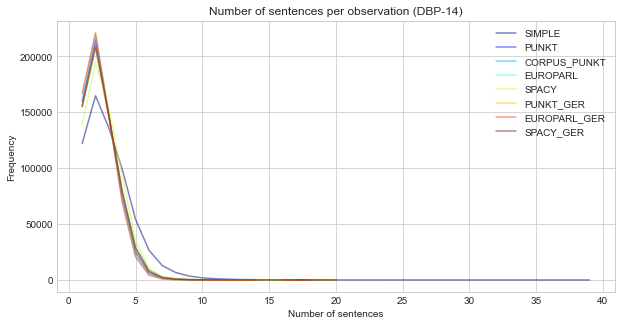

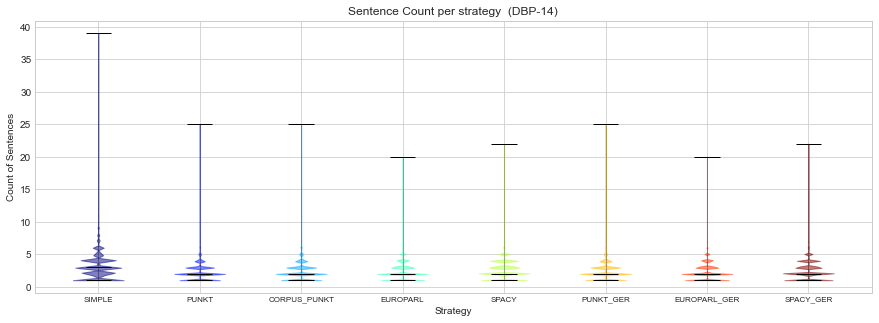

GERMEVAL-2018 with SIMPLE took 0.078125s
GERMEVAL-2018 with PUNKT took 0.640625s
GERMEVAL-2018 with CORPUS_PUNKT took 2.25s
GERMEVAL-2018 with EUROPARL took 1.640625s
GERMEVAL-2018 with SPACY took 3.015625s
GERMEVAL-2018 with PUNKT_GER took 0.625s
GERMEVAL-2018 with EUROPARL_GER took 1.578125s
GERMEVAL-2018 with SPACY_GER took 2.90625s


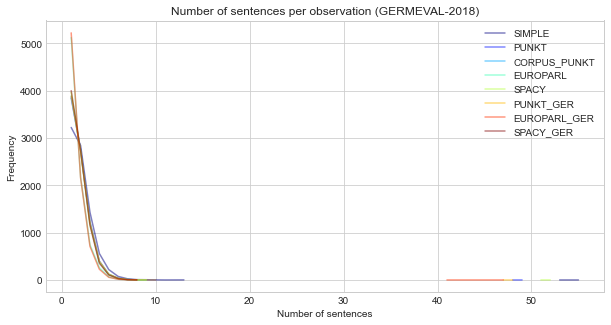

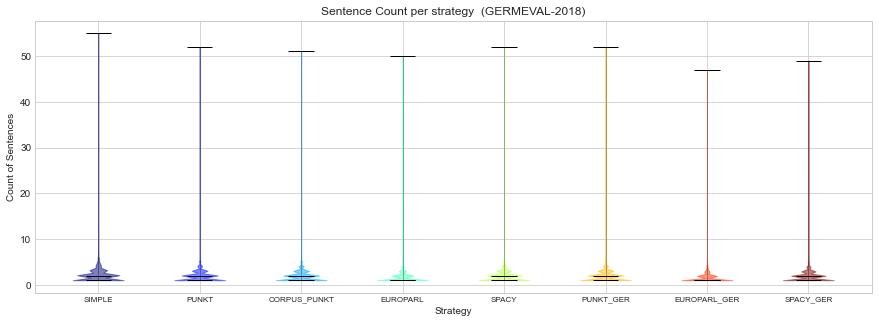

GERMEVAL-2020 with SIMPLE took 1.328125s
GERMEVAL-2020 with PUNKT took 10.359375s
GERMEVAL-2020 with CORPUS_PUNKT took 45.140625s
GERMEVAL-2020 with EUROPARL took 49.46875s
GERMEVAL-2020 with SPACY took 38.484375s
GERMEVAL-2020 with PUNKT_GER took 10.390625s
GERMEVAL-2020 with EUROPARL_GER took 49.25s
GERMEVAL-2020 with SPACY_GER took 38.0s


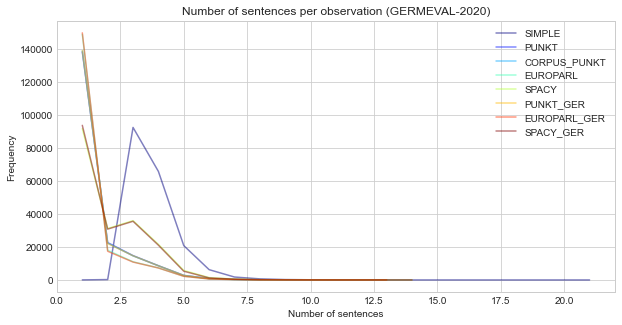

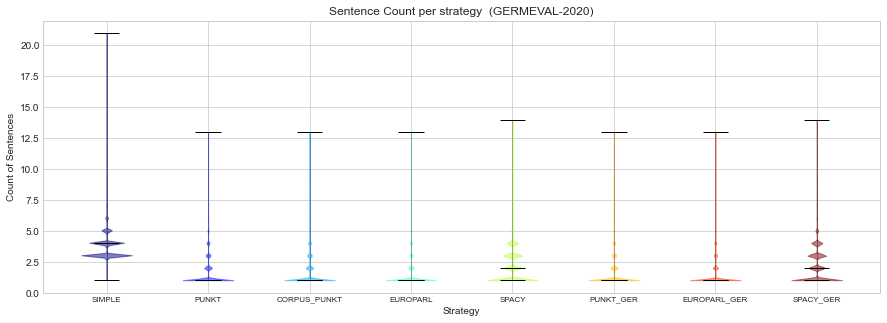

TREC-6 with SIMPLE took 0.03125s
TREC-6 with PUNKT took 0.21875s
TREC-6 with CORPUS_PUNKT took 0.609375s
TREC-6 with EUROPARL took 0.640625s
TREC-6 with SPACY took 1.078125s
TREC-6 with PUNKT_GER took 0.21875s
TREC-6 with EUROPARL_GER took 0.703125s
TREC-6 with SPACY_GER took 0.984375s


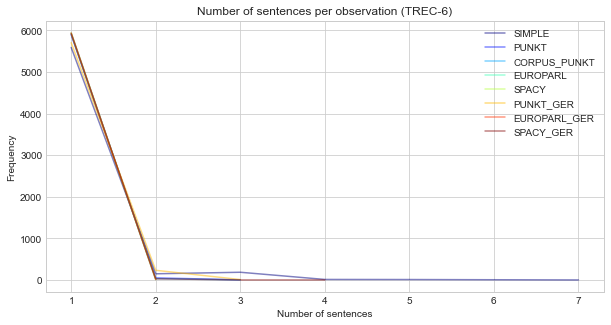

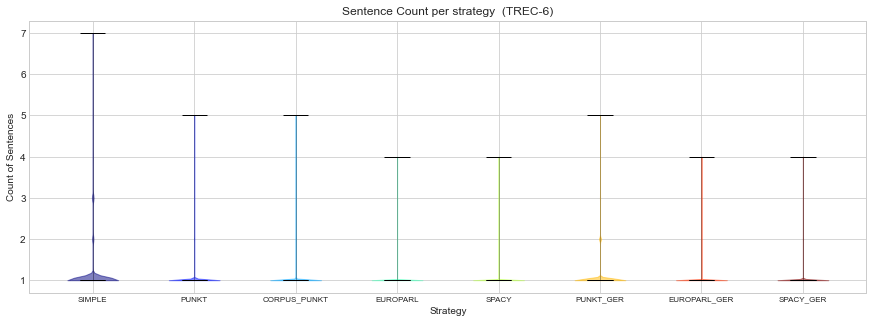

YELP-5 with SIMPLE took 16.015625s
YELP-5 with PUNKT took 204.671875s
YELP-5 with EUROPARL took 730.0s
YELP-5 with SPACY took 428.375s
YELP-5 with PUNKT_GER took 219.9375s
YELP-5 with EUROPARL_GER took 797.53125s
YELP-5 with SPACY_GER took 394.15625s


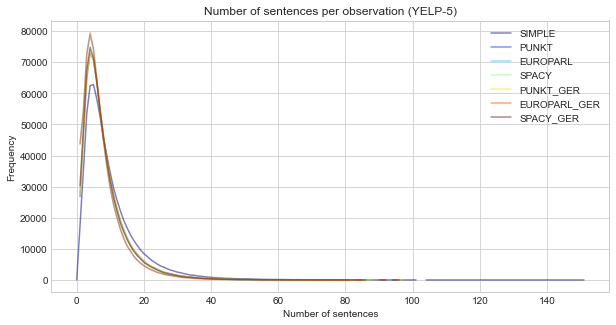

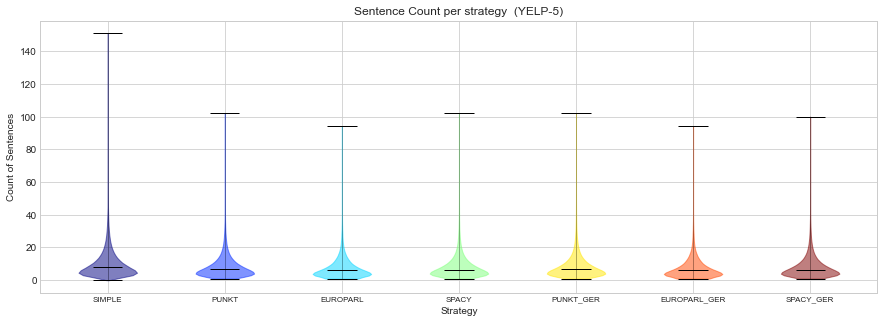

In [6]:
for dataset in files.keys():
    dfs = []
    for strategy in SentenceTokenizerStrategy:
        if strategy == SentenceTokenizerStrategy.CORPUS_PUNKT and dataset == 'YELP-5':
            continue # too big for training
        dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: SentenceCountAnalyzer(texts, strategy=strategy), strategy.name))
    dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: SentenceCountAnalyzer(texts, strategy=SentenceTokenizerStrategy.PUNKT, language='german'), 'PUNKT_GER'))
    dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: SentenceCountAnalyzer(texts, strategy=SentenceTokenizerStrategy.EUROPARL, language='german'), 'EUROPARL_GER'))
    dfs.append(get_ds_stats(dataset, files[dataset], lambda texts: SentenceCountAnalyzer(texts, strategy=SentenceTokenizerStrategy.SPACY, language='german'), 'SPACY_GER'))
    df = pd.concat(dfs, axis=1)
    line_plot(df, dataset)
    violin_plot(df, dataset)
    df.to_csv(f'sentence_compare/{dataset}.csv')

In [1]:
p_text = """
10K-GNAD with SIMPLE took 0.75s
10K-GNAD with PUNKT took 8.03125s
10K-GNAD with CORPUS_PUNKT took 49.765625s
10K-GNAD with EUROPARL took 30.8125s
10K-GNAD with SPACY took 33.15625s
10K-GNAD with PUNKT_GER took 8.140625s
10K-GNAD with EUROPARL_GER took 30.234375s
10K-GNAD with SPACY_GER took 28.1875s
10K-GNAD with SPACY_GER took 28.078125s
DBP-14 with SIMPLE took 6.546875s
DBP-14 with PUNKT took 59.28125s
DBP-14 with CORPUS_PUNKT took 817.578125s
DBP-14 with EUROPARL took 246.234375s
DBP-14 with SPACY took 353.375s
DBP-14 with PUNKT_GER took 59.203125s
DBP-14 with EUROPARL_GER took 247.265625s
DBP-14 with SPACY_GER took 363.109375s
GERMEVAL-2018 with SIMPLE took 0.078125s
GERMEVAL-2018 with PUNKT took 0.640625s
GERMEVAL-2018 with CORPUS_PUNKT took 2.25s
GERMEVAL-2018 with EUROPARL took 1.640625s
GERMEVAL-2018 with SPACY took 3.015625s
GERMEVAL-2018 with PUNKT_GER took 0.625s
GERMEVAL-2018 with EUROPARL_GER took 1.578125s
GERMEVAL-2018 with SPACY_GER took 2.90625s
GERMEVAL-2020 with SIMPLE took 1.328125s
GERMEVAL-2020 with PUNKT took 10.359375s
GERMEVAL-2020 with CORPUS_PUNKT took 45.140625s
GERMEVAL-2020 with EUROPARL took 49.46875s
GERMEVAL-2020 with SPACY took 38.484375s
GERMEVAL-2020 with PUNKT_GER took 10.390625s
GERMEVAL-2020 with EUROPARL_GER took 49.25s
GERMEVAL-2020 with SPACY_GER took 38.0s
TREC-6 with SIMPLE took 0.03125s
TREC-6 with PUNKT took 0.21875s
TREC-6 with CORPUS_PUNKT took 0.609375s
TREC-6 with EUROPARL took 0.640625s
TREC-6 with SPACY took 1.078125s
TREC-6 with PUNKT_GER took 0.21875s
TREC-6 with EUROPARL_GER took 0.703125s
TREC-6 with SPACY_GER took 0.984375s
YELP-5 with SIMPLE took 16.015625s
YELP-5 with PUNKT took 204.671875s
YELP-5 with EUROPARL took 730.0s
YELP-5 with SPACY took 428.375s
YELP-5 with PUNKT_GER took 219.9375s
YELP-5 with EUROPARL_GER took 797.53125s
YELP-5 with SPACY_GER took 394.15625s
"""
p_texts = p_text.split("\n")

In [4]:
p_stats = []
for text in p_texts:
    parts = text.split()
    if len(parts) < 5:
        continue
    p_stats.append({
        'dataset': parts[0],
        'tokenizer': parts[2],
        'time': float(parts[4][:-1])
    })
df_perf = pd.DataFrame(p_stats)

In [5]:
for dataset in df_perf.dataset.unique():
    cnt_observations = pd.read_csv(f'sentence_compare/{dataset}.csv', index_col=0).sum(axis=0).max()
    df_perf.loc[df_perf['dataset']==dataset, 'observations'] = cnt_observations
df_perf['obs_per_s'] = df_perf['observations']/df_perf['time']
df_perf

,dataset,tokenizer,time,observations,obs_per_s
0,10K-GNAD,SIMPLE,0.750000,10273.0,13697.333333
1,10K-GNAD,PUNKT,8.031250,10273.0,1279.128405
2,10K-GNAD,CORPUS_PUNKT,49.765625,10273.0,206.427630
3,10K-GNAD,EUROPARL,30.812500,10273.0,333.403651
4,10K-GNAD,SPACY,33.156250,10273.0,309.836004
5,10K-GNAD,PUNKT_GER,8.140625,10273.0,1261.942418
6,10K-GNAD,EUROPARL_GER,30.234375,10273.0,339.778811
7,10K-GNAD,SPACY_GER,28.187500,10273.0,364.452328
8,10K-GNAD,SPACY_GER,28.078125,10273.0,365.872009
9,DBP-14,SIMPLE,6.546875,630000.0,96229.116945


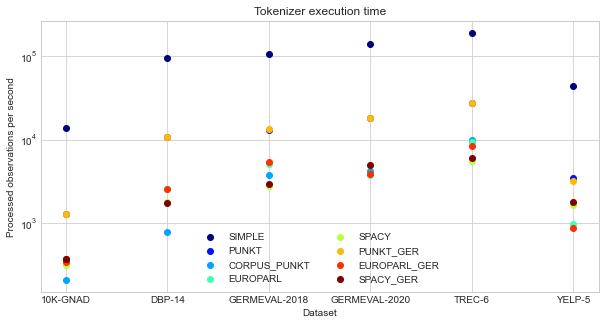

In [7]:
colormap=plt.cm.jet(np.linspace(0, 1, df_perf.tokenizer.nunique()))
fig = plt.figure(figsize=(10,5))
ax = plt.gca()
for col, tokenizer in zip(colormap, df_perf.tokenizer.unique()):
    df_sub = df_perf[df_perf['tokenizer']==tokenizer]
    ax.scatter(x=df_sub.dataset, y=df_sub.obs_per_s, color=col)
ax.set_yscale('log')
ax.legend(df_perf.tokenizer.unique(), loc='lower center', ncol=2)
ax.set_title('Tokenizer execution time')
ax.set_xlabel('Dataset')
ax.set_ylabel('Processed observations per second')
plt.savefig(f'sentence_compare/007_sentence_execution_time.pdf')
plt.show()

In [3]:
for dataset in files.keys():
    print(dataset)
    df = pd.read_csv(f'sentence_compare/{dataset}.csv', index_col=0)
    df_s = pd.DataFrame([df.index.repeat(df[col].fillna(0)) for col in df.columns], index=df.columns).T.agg(['mean', 'count', 'std']).T
    c_r = 1.96*df_s['std']/df_s['count']**.5
    df_s['c95_hi'] = df_s['mean'] + c_r
    df_s['c95_lo'] = df_s['mean'] - c_r
    df_s['c95'] = c_r
    print(df_s.T)

10K-GNAD
              SIMPLE         PUNKT  CORPUS_PUNKT      EUROPARL         SPACY  \
mean       24.825562     23.061326     22.438041     22.754794     23.135988   
count   10273.000000  10273.000000  10273.000000  10273.000000  10273.000000   
std        19.654293     18.361058     18.008167     18.104059     18.453046   
c95_hi     25.205633     23.416389     22.786280     23.104887     23.492829   
c95_lo     24.445491     22.706263     22.089803     22.404701     22.779146   
c95         0.380071      0.355063      0.348239      0.350093      0.356842   

           PUNKT_GER  EUROPARL_GER     SPACY_GER  
mean       22.597781     21.886012     21.827898  
count   10273.000000  10273.000000  10273.000000  
std        18.208799     17.633689     17.609503  
c95_hi     22.949899     22.227009     22.168428  
c95_lo     22.245662     21.545015     21.487369  
c95         0.352118      0.340997      0.340529  
DBP-14
               SIMPLE          PUNKT   CORPUS_PUNKT       EUROPARL

In [4]:
s_means = []
for dataset in files.keys():
    df = pd.read_csv(f'sentence_compare/{dataset}.csv', index_col=0)
    means = df.multiply(df.index, axis=0).sum(axis=0)/df.sum(axis=0)
    s_means.append(pd.Series(means, name=dataset))

df_means = pd.DataFrame(s_means).T
df_means

,10K-GNAD,DBP-14,GERMEVAL-2018,GERMEVAL-2020,TREC-6,YELP-5
SIMPLE,24.825562,3.039730,2.090163,3.737696,1.102487,10.123917
PUNKT,23.061326,2.397305,1.875104,1.513066,1.010585,8.500249
CORPUS_PUNKT,22.438041,2.475733,1.861663,1.506276,1.006552,NaN
EUROPARL,22.754794,2.344194,1.601166,1.405398,1.001848,7.567421
SPACY,23.135988,2.586910,1.849411,2.078006,1.003192,8.369366
PUNKT_GER,22.597781,2.465802,1.865112,1.506239,1.043515,8.473703
EUROPARL_GER,21.886012,2.323856,1.570477,1.396338,1.001848,7.504047
SPACY_GER,21.827898,2.449644,1.825978,2.045064,1.005712,8.256521


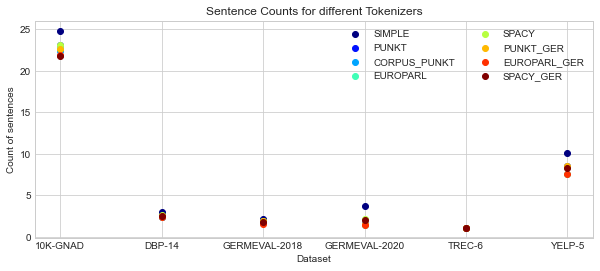

In [5]:
colormap=plt.cm.jet(np.linspace(0, 1, df_means.index.size))
fig = plt.figure(figsize=(10,4))
ax = plt.gca()
for col, dataset in zip(colormap, df_means.index):
    s = df_means.loc[dataset]
    ax.scatter(x=s.index, y=s.values, color=col)
ax.legend(df_means.index, loc='upper right', ncol=2)
ax.set_title('Sentence Counts for different Tokenizers')
ax.set_xlabel('Dataset')
ax.set_ylabel('Count of sentences')
plt.savefig(f'sentence_compare/008_sentence_estimates.pdf')
plt.show()